      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

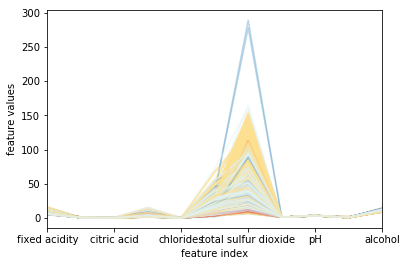

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
wine = pd.read_csv(target_url,header=0,sep=";")
print(wine)
summary = wine.describe()
print(summary)
quality_high = summary.iloc[7,11]
quality_low = summary.iloc[3,11]
nrows = len(wine.index)
#print(nrows)

for i in range(nrows):
    datarow = wine.iloc[i,0:11]
    labelColor = (wine.iloc[i,11]-quality_low)/(quality_high-quality_low)
    datarow.plot(color=plot.cm.RdYlBu(labelColor),alpha = 0.5)
plot.xlabel("feature index")
plot.ylabel("feature values")
plot.show()
    


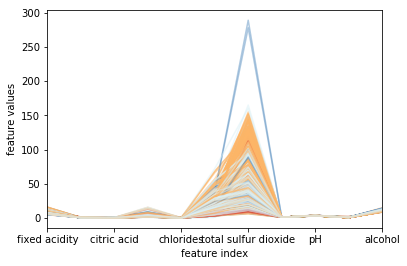

In [13]:
# we can also do normalized data
from math import exp
quality_mean = summary.iloc[1,11]
quality_std = summary.iloc[2,11]
nrows = len(wine.index)
for i in range(nrows):
    datarow = wine.iloc[i,0:11]
    normTarget = ((wine.iloc[i,11])-quality_mean)/(quality_std)
    labelColor = (1.0/(1.0+exp(-normTarget)))
    datarow.plot(color=plot.cm.RdYlBu(labelColor),alpha = 0.5)
plot.xlabel("feature index")
plot.ylabel("feature values")
plot.show()

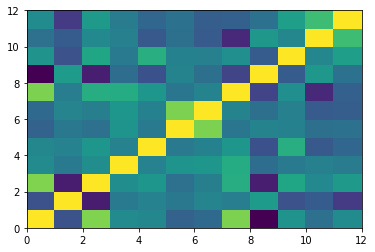

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [15]:
# correlation heat map
from pandas import DataFrame
Corrmat = DataFrame(wine.iloc[:,0:12].corr())
plot.pcolor(Corrmat)
plot.show()
print(Corrmat)
